In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, opponent_feature_names, visualize=False, num_players=580)
train_loader, test_loader = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fa576ef8d10>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa576e4fb10>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)
player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)

player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))

0.897926299676756
SpearmanrResult(correlation=0.5918475799188377, pvalue=8.210884135341654e-284)
0.7553932374573992
SpearmanrResult(correlation=0.6095911573147823, pvalue=1.3340360330392236e-305)
0.5682166011245015
SpearmanrResult(correlation=0.6297954270503311, pvalue=0.0)
0.5669925381891765
SpearmanrResult(correlation=0.6197032776857848, pvalue=1.191884e-318)


torch.Size([3008, 5, 4])


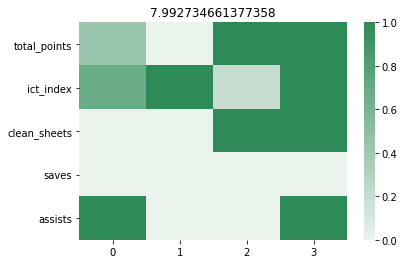

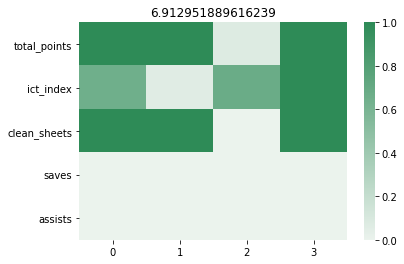

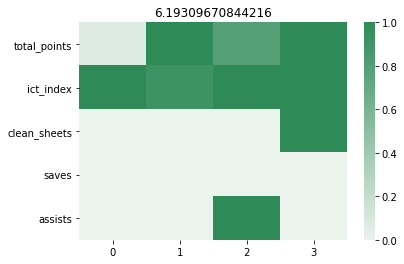

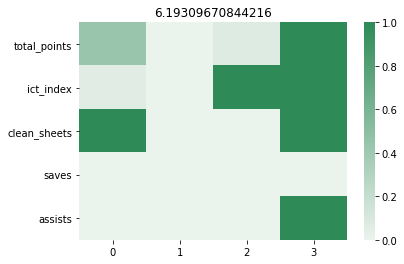

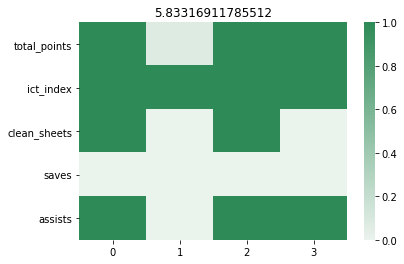

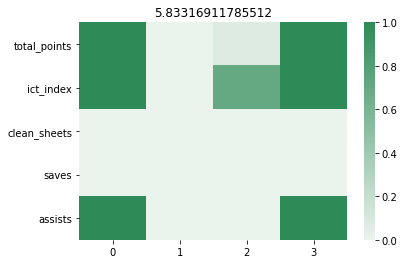

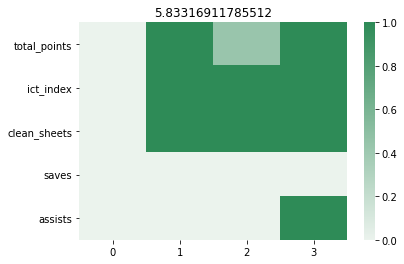

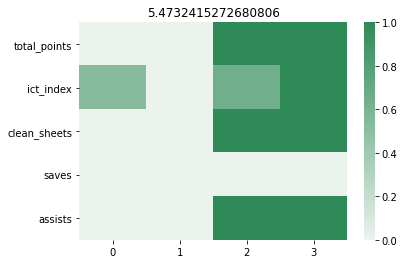

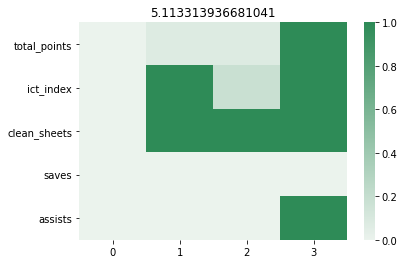

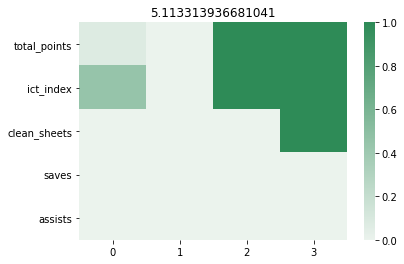

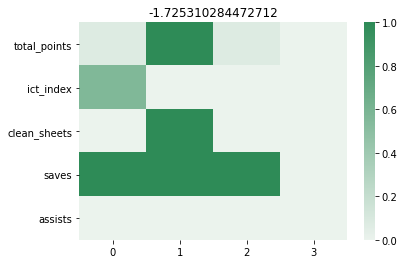

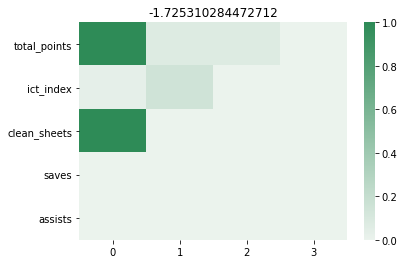

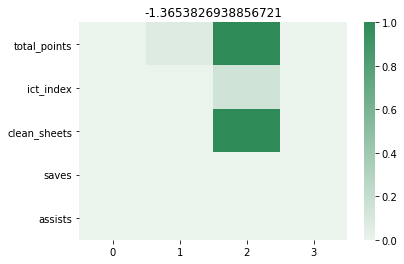

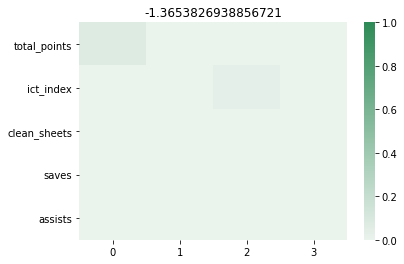

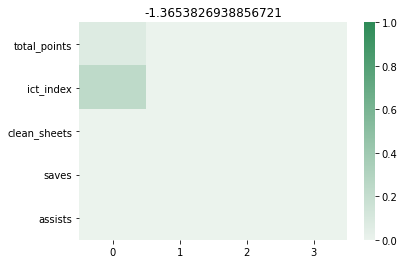

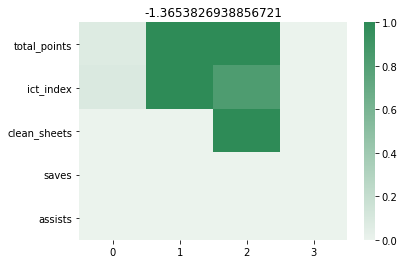

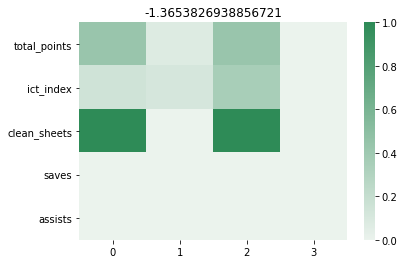

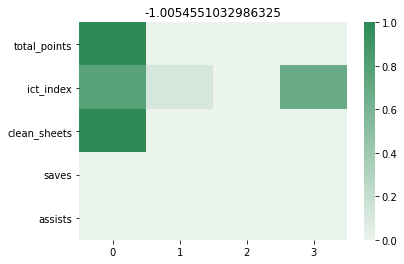

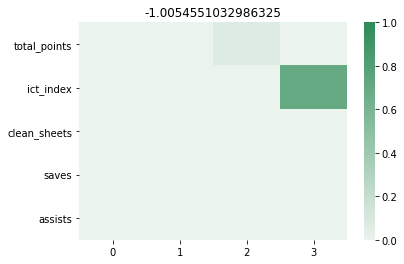

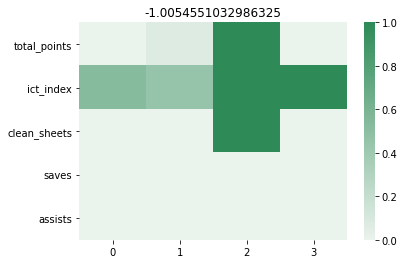

In [4]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3008, 5, 4])


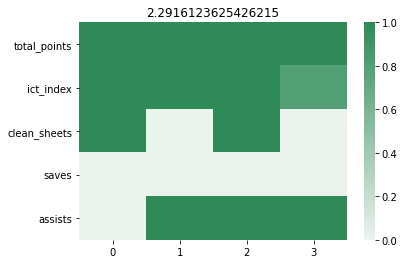

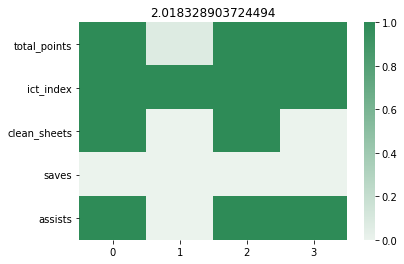

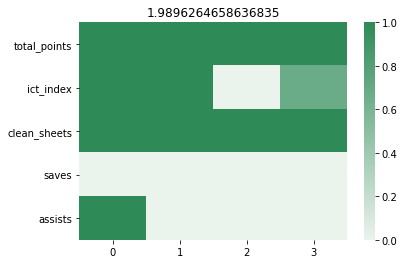

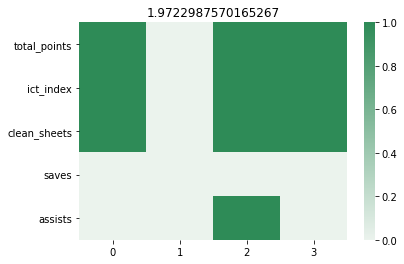

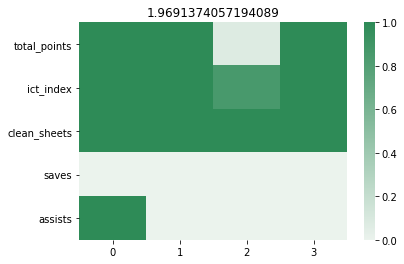

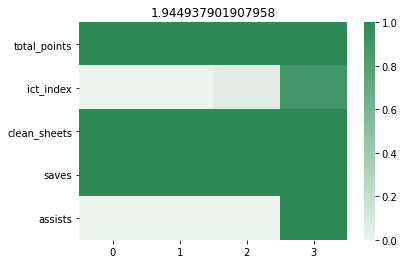

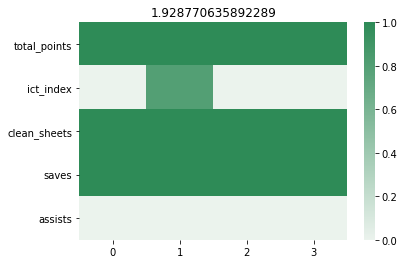

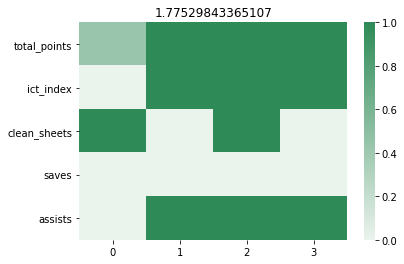

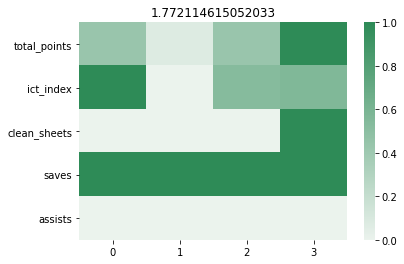

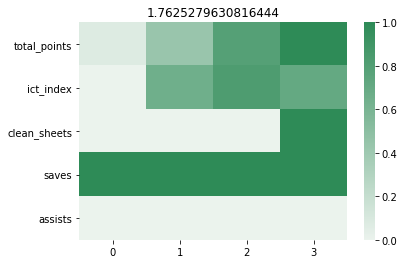

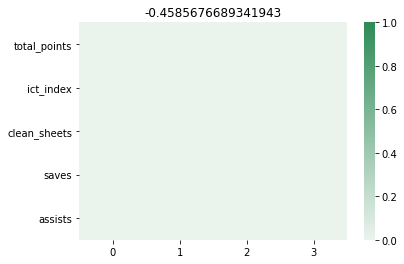

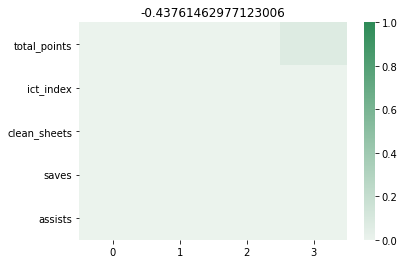

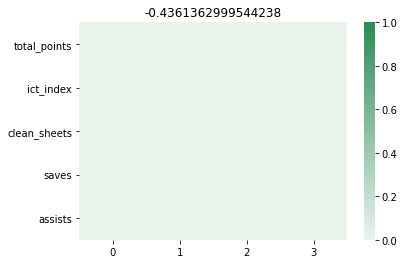

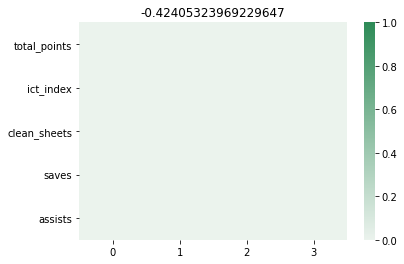

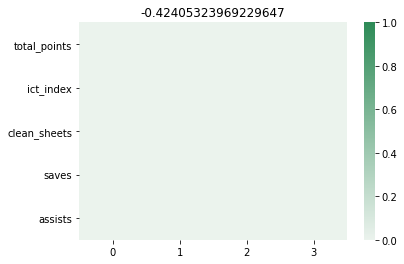

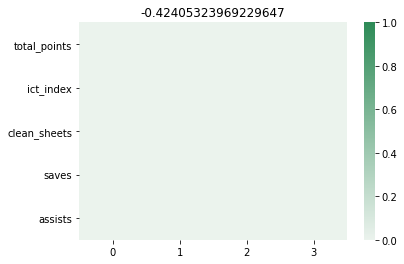

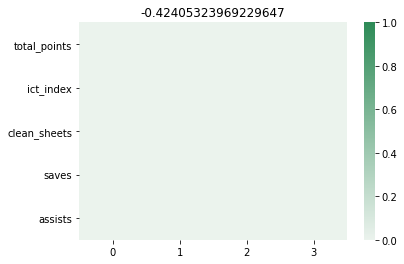

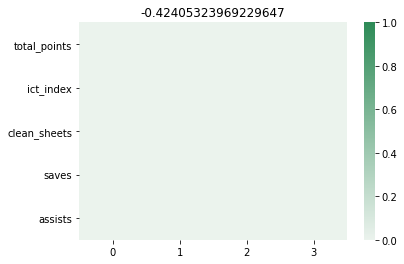

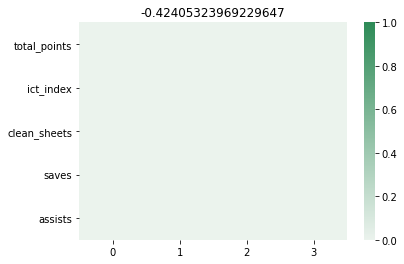

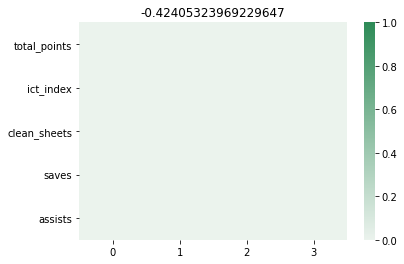

In [5]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3008, 5, 4])


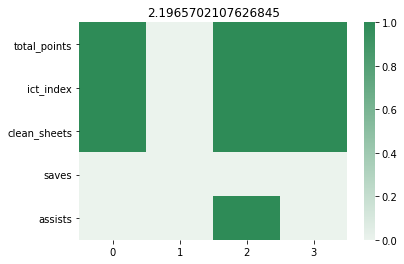

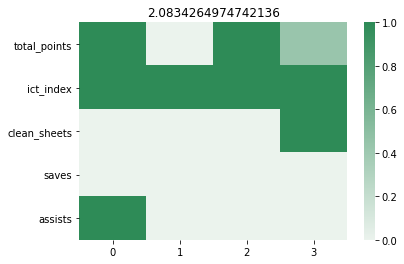

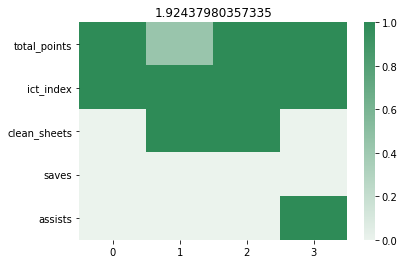

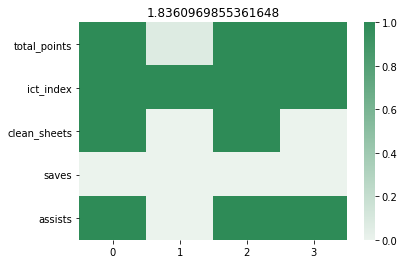

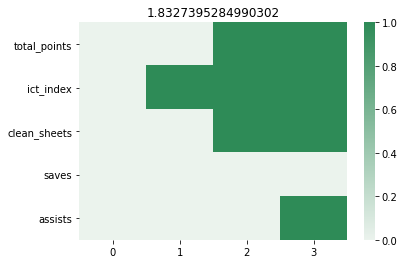

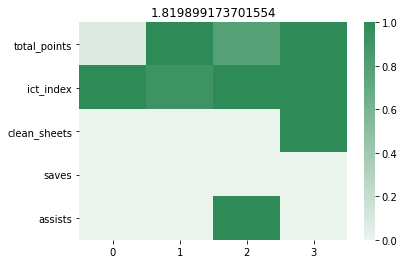

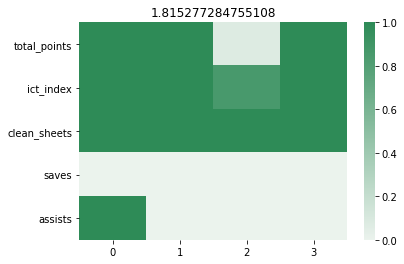

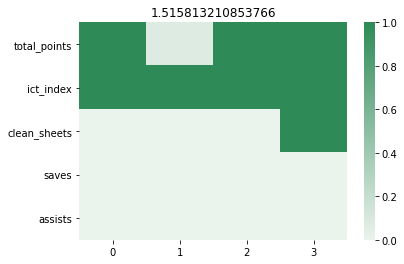

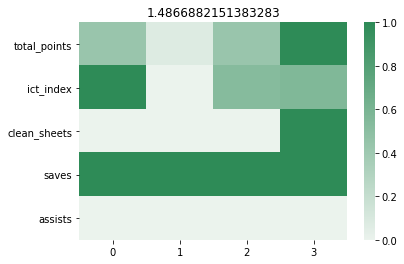

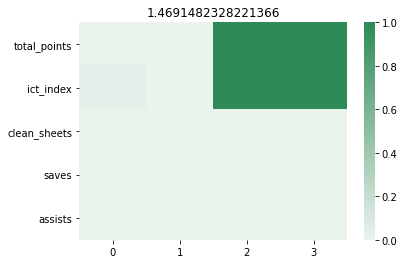

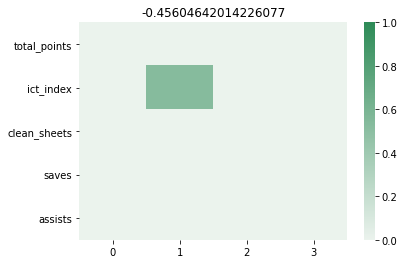

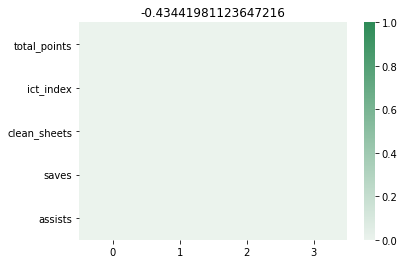

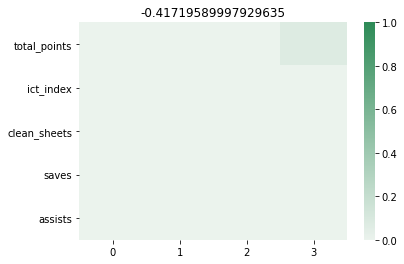

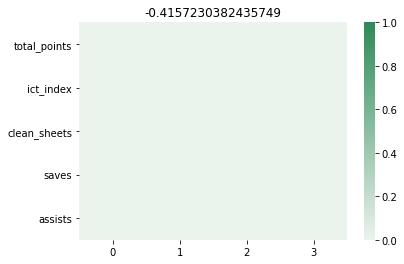

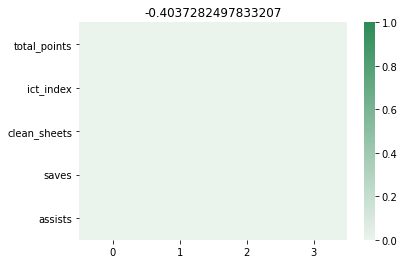

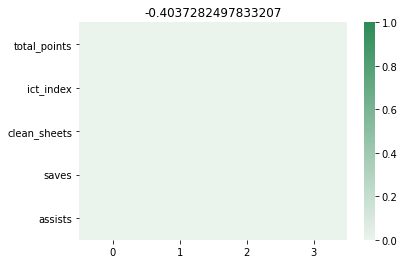

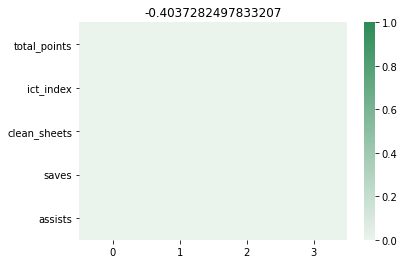

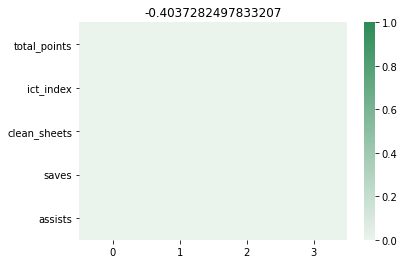

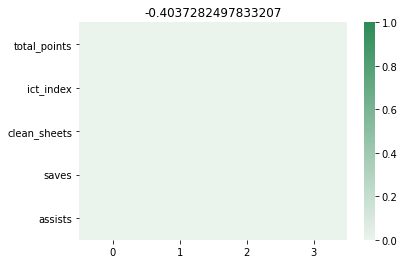

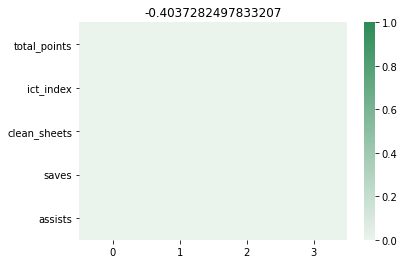

In [6]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3008, 20])


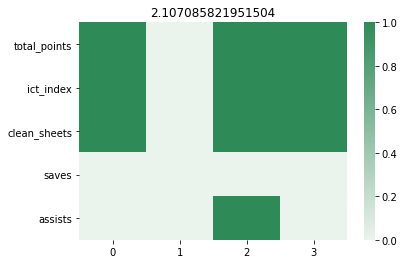

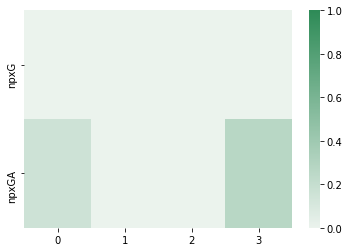

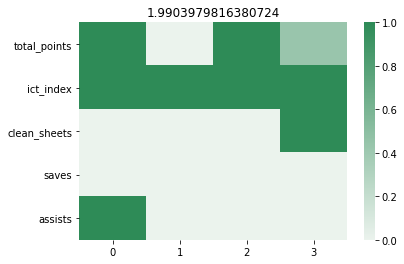

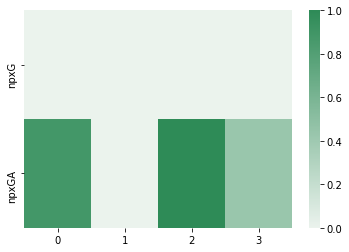

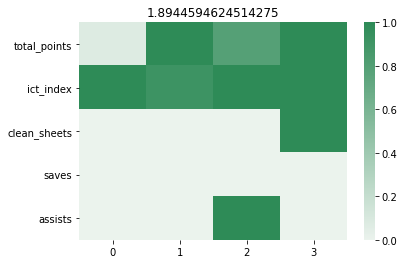

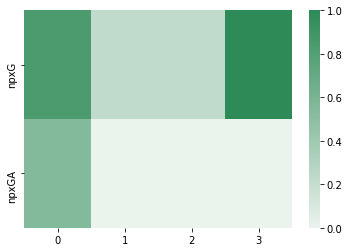

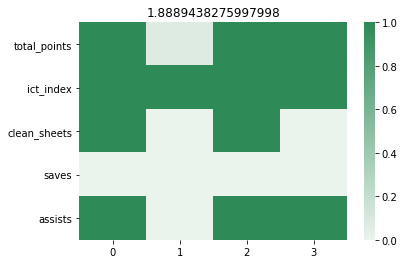

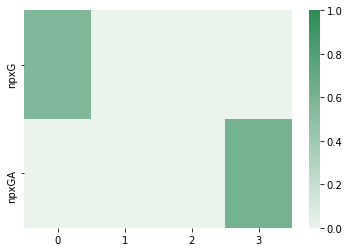

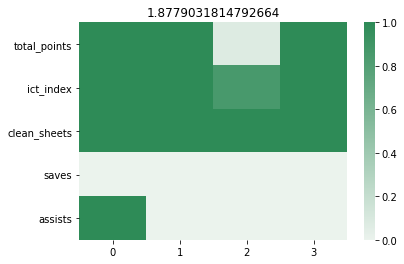

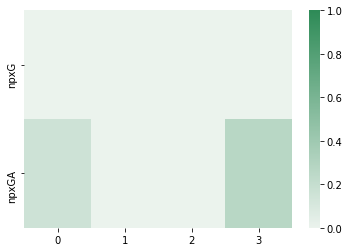

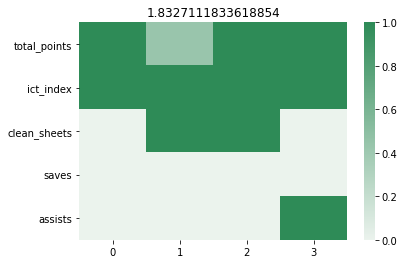

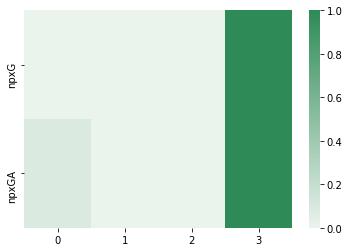

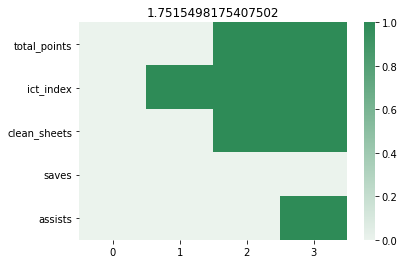

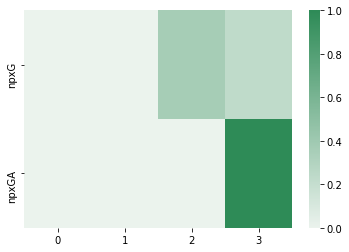

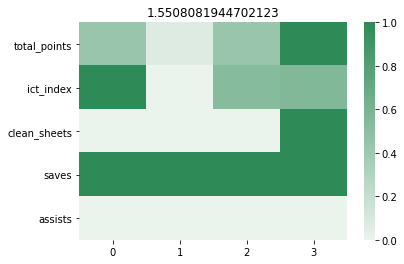

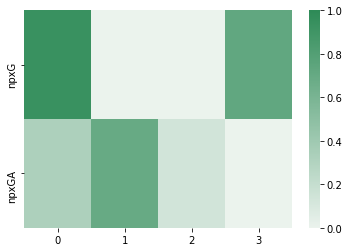

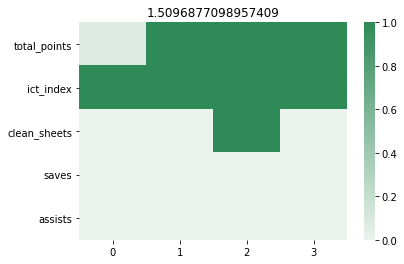

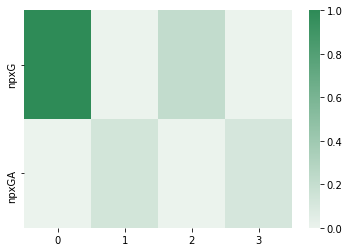

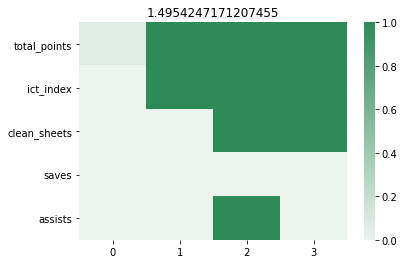

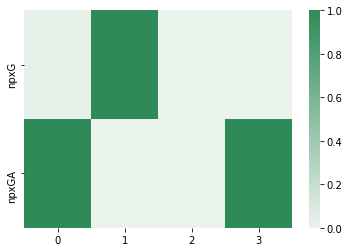

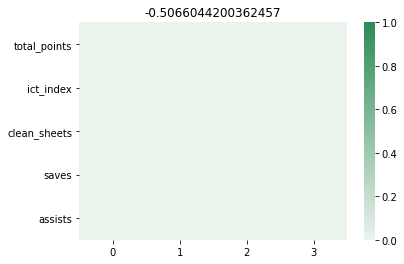

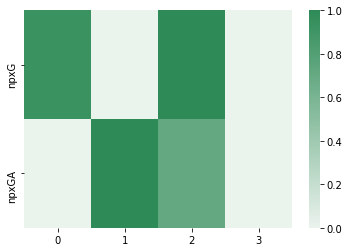

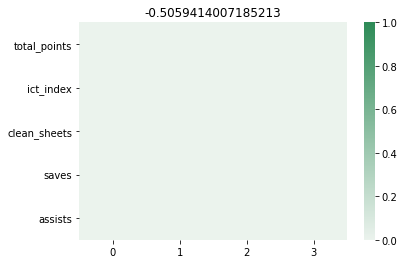

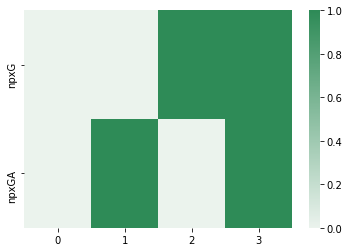

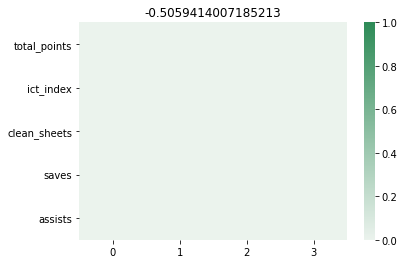

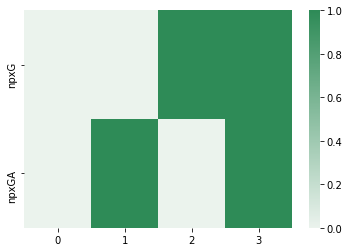

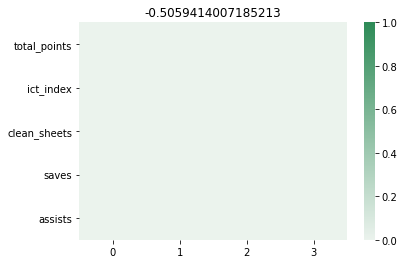

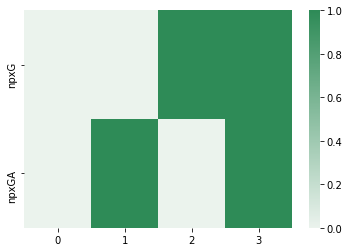

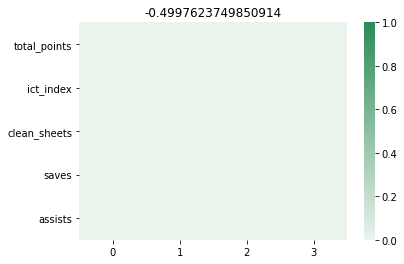

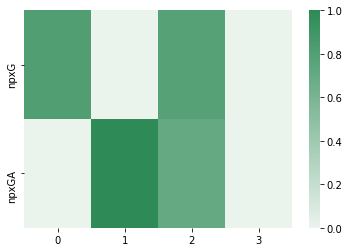

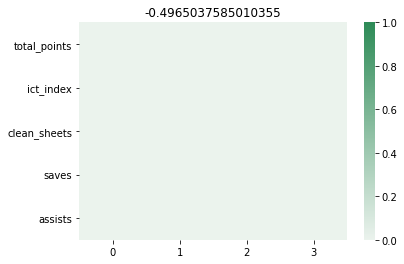

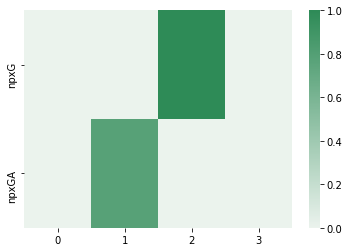

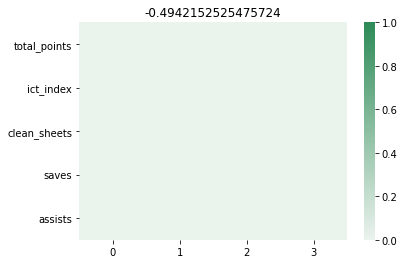

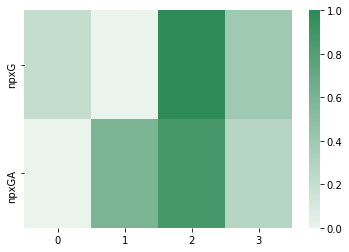

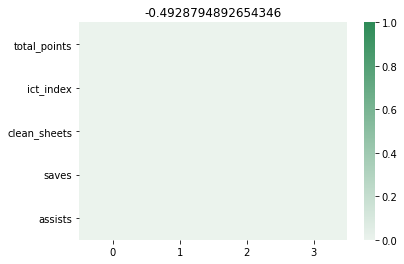

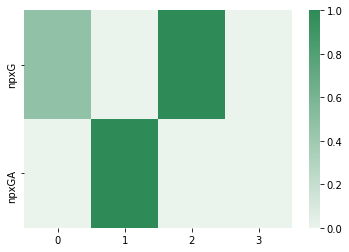

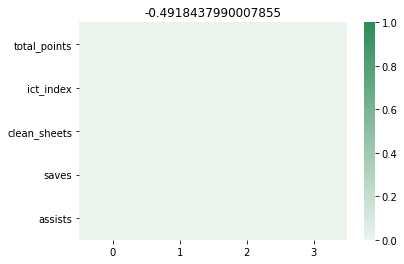

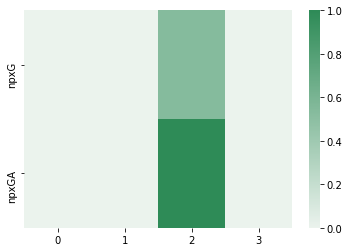

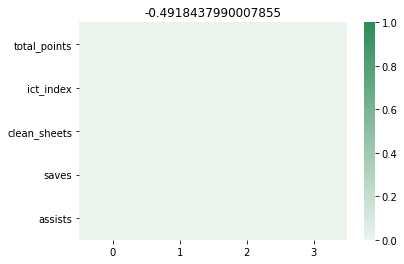

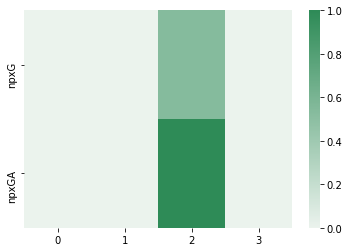

In [7]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

In [8]:
list(player_linear_score_model.model.parameters())

[Parameter containing:
 tensor([[ 0.0491,  0.0445,  0.0719,  0.0335,  0.0481,  0.0459,  0.0894,  0.1743,
          -0.0113,  0.0424,  0.0121,  0.0462,  0.0570, -0.0045,  0.0190,  0.0344,
          -0.0115, -0.0016, -0.0292, -0.0186]], dtype=torch.float64,
        requires_grad=True),
 Parameter containing:
 tensor([0.0082], dtype=torch.float64, requires_grad=True)]